In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

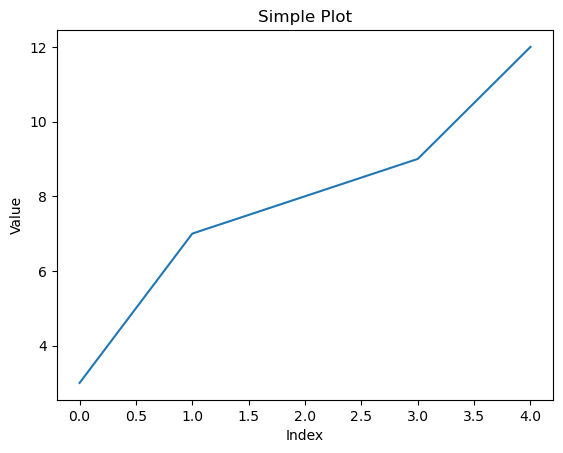

In [2]:
data = [3, 7, 8, 9, 12]

plt.plot(data)
plt.title('Simple Plot')
plt.xlabel('Index')
plt.ylabel('Value')

plt.show()


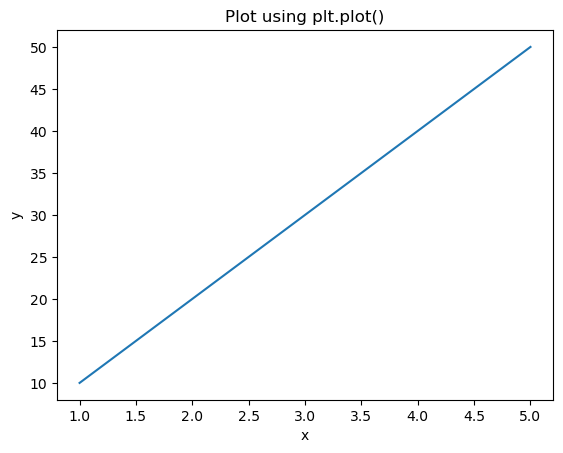

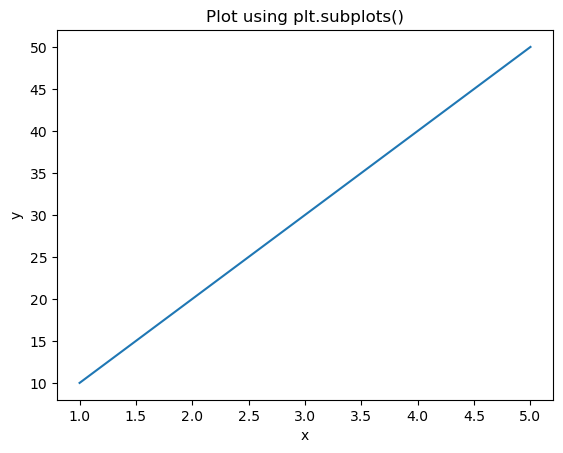

In [3]:
x = [1, 2, 3, 4, 5]
y = [10, 20, 30, 40, 50]

# Plot x and y using plt.plot()
plt.plot(x, y)
plt.title('Plot using plt.plot()')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Create a plot using plt.subplots() and then add x & y on the axes
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Plot using plt.subplots()')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


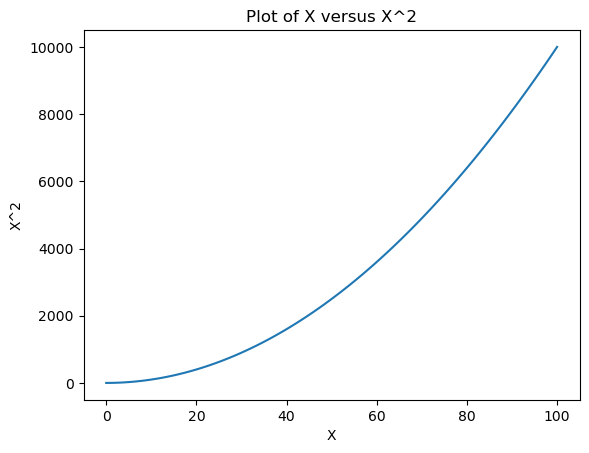

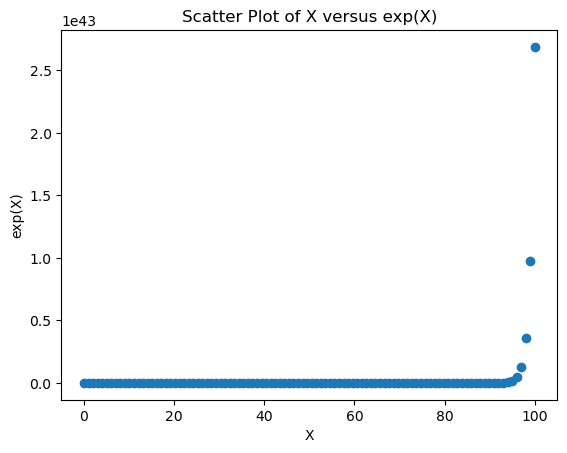

In [4]:
X = np.linspace(0, 100, 100)

# Create a plot using plt.subplots() and plot X versus X^2
fig, ax = plt.subplots()
ax.plot(X, X**2)
ax.set_title('Plot of X versus X^2')
ax.set_xlabel('X')
ax.set_ylabel('X^2')
plt.show()

# Create a scatter plot of X versus the exponential of X (np.exp(X))
plt.scatter(X, np.exp(X))
plt.title('Scatter Plot of X versus exp(X)')
plt.xlabel('X')
plt.ylabel('exp(X)')
plt.show()


In [5]:
data=pd.read_csv("car-sales.csv")

In [6]:
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000"
1,Honda,Red,87899,4,"$5,000"
2,Toyota,Blue,32549,3,"$7,000"
3,BMW,Black,11179,5,"$22,000"
4,Nissan,White,213095,4,"$3,500"


In [7]:
data['Price'] = data['Price'].replace({'\\$': '', ',': ''}, regex=True).astype('int64')


In [8]:
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500


In [9]:
data['Total Sales'] = data['Price'].cumsum()

In [10]:
data.head()

,Make,Colour,Odometer (KM),Doors,Price,Total Sales
0,Toyota,White,150043,4,4000,4000
1,Honda,Red,87899,4,5000,9000
2,Toyota,Blue,32549,3,7000,16000
3,BMW,Black,11179,5,22000,38000
4,Nissan,White,213095,4,3500,41500


In [11]:
data['Sale Date'] = pd.date_range(start=pd.Timestamp.today(), periods=len(data))
data['Sale Date'] = data['Sale Date'].dt.date

In [12]:
data.head()

,Make,Colour,Odometer (KM),Doors,Price,Total Sales,Sale Date
0,Toyota,White,150043,4,4000,4000,2024-09-26
1,Honda,Red,87899,4,5000,9000,2024-09-27
2,Toyota,Blue,32549,3,7000,16000,2024-09-28
3,BMW,Black,11179,5,22000,38000,2024-09-29
4,Nissan,White,213095,4,3500,41500,2024-09-30


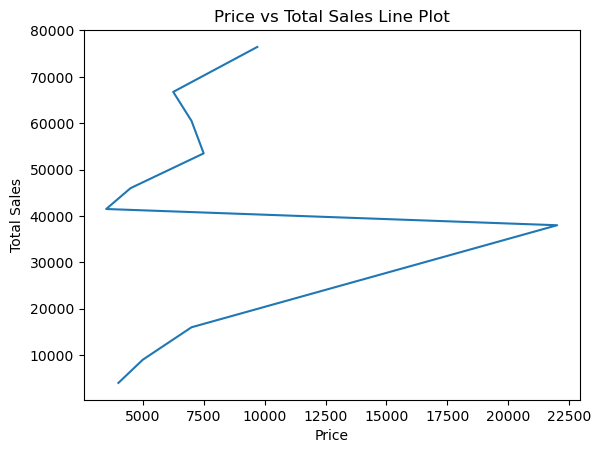

In [13]:
plt.plot(data['Price'], data['Total Sales'])
plt.title('Price vs Total Sales Line Plot')
plt.xlabel('Price')
plt.ylabel('Total Sales')
plt.show()

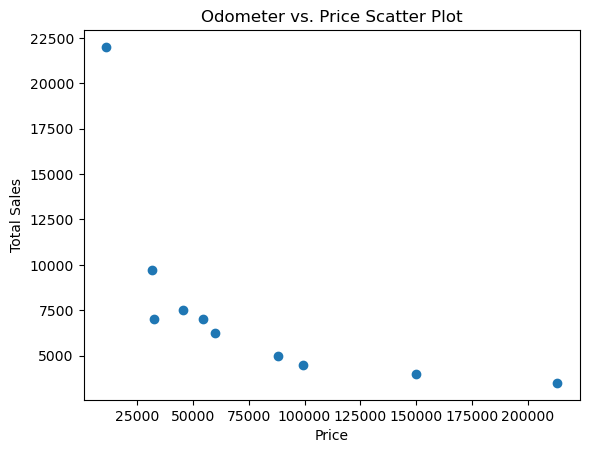

In [14]:
plt.scatter(data['Odometer (KM)'], data['Price'])
plt.title('Odometer vs. Price Scatter Plot')
plt.xlabel('Price')
plt.ylabel('Total Sales')
plt.show()

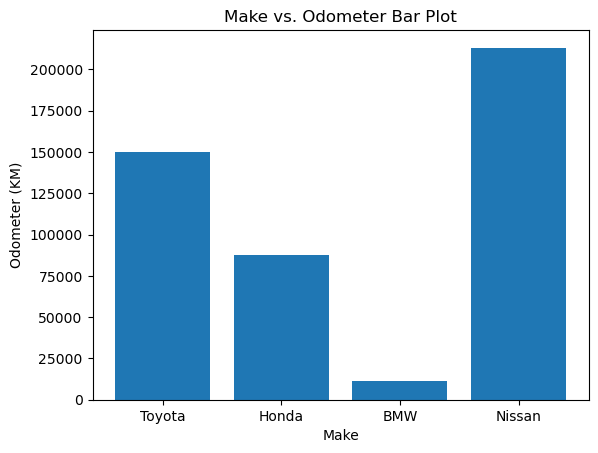

In [15]:
plt.bar(data['Make'], data['Odometer (KM)'])
plt.title('Make vs. Odometer Bar Plot')
plt.xlabel('Make')
plt.ylabel('Odometer (KM)')
plt.show()

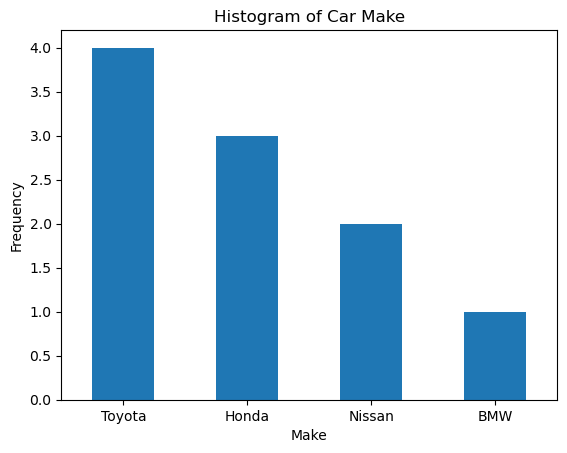

In [16]:
data['Make'].value_counts().plot(kind='bar')
plt.title('Histogram of Car Make')
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.xticks(rotation=360)
plt.show()

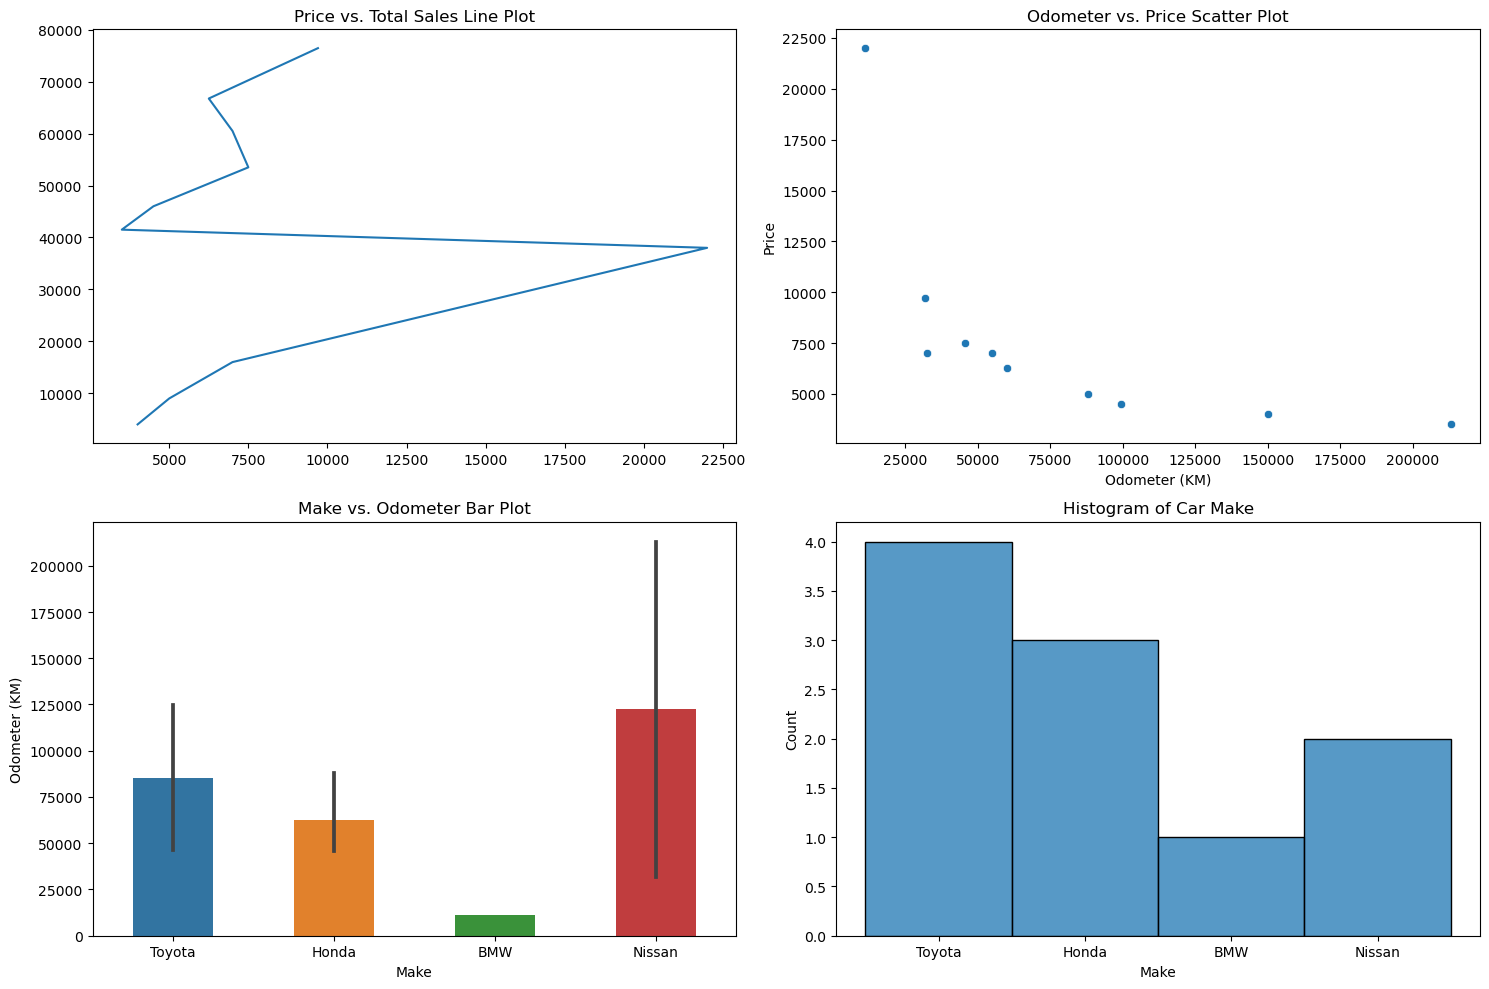

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0,0].plot(data['Price'], data['Total Sales'])
sns.scatterplot(x='Odometer (KM)', y='Price', data=data, ax=axs[0, 1])
sns.barplot(x='Make', y='Odometer (KM)', data=data, ax=axs[1, 0], width=0.5)
sns.histplot(data['Make'], ax=axs[1, 1])


axs[0, 0].set_title('Price vs. Total Sales Line Plot')
axs[0, 1].set_title('Odometer vs. Price Scatter Plot')
axs[1, 0].set_title('Make vs. Odometer Bar Plot')
axs[1, 1].set_title('Histogram of Car Make')

plt.tight_layout()
plt.show()


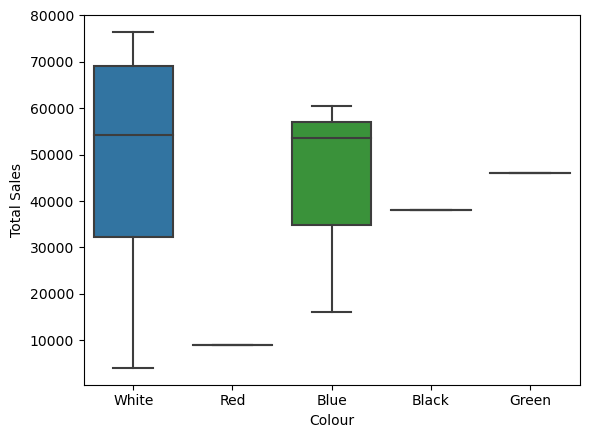

In [18]:
sns.boxplot(x=data['Colour'], y=data['Total Sales'])
plt.show()

C:\Users\APBaker\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


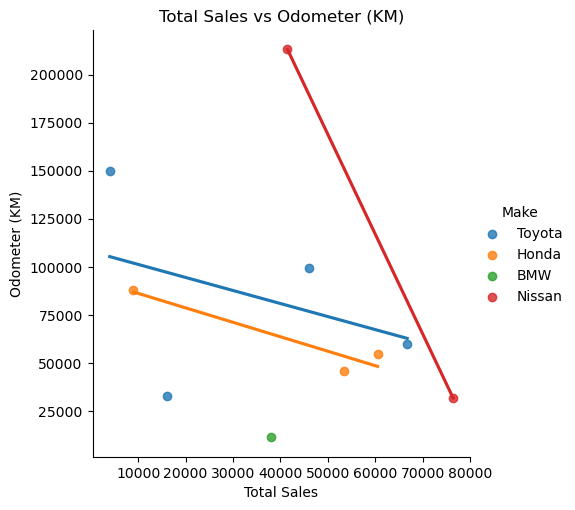

In [19]:
sns.lmplot(x='Total Sales', y='Odometer (KM)', hue='Make', data=data, ci=None)
plt.title('Total Sales vs Odometer (KM)')
plt.xlabel('Total Sales')
plt.ylabel('Odometer (KM)')
plt.show()

C:\Users\APBaker\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


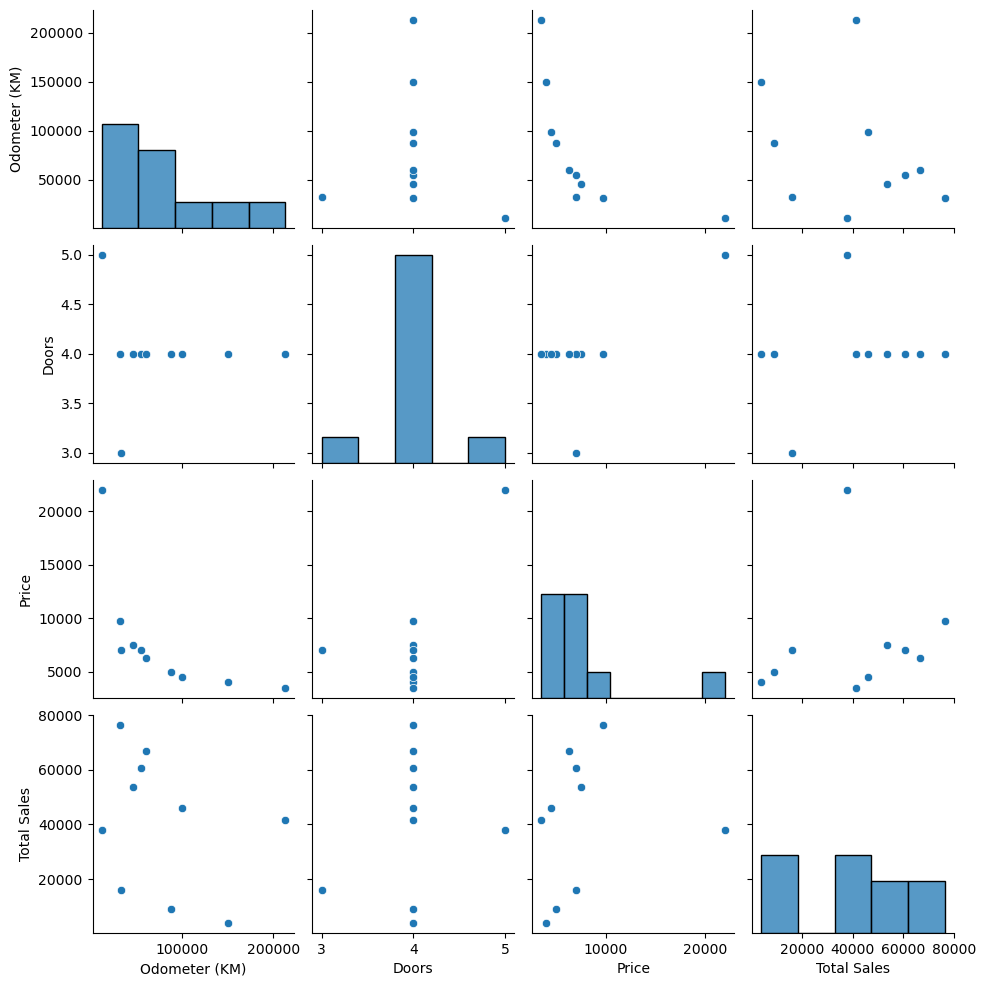

In [20]:
sns.pairplot(data[['Odometer (KM)', 'Doors', 'Price', 'Total Sales']])

<Axes: >

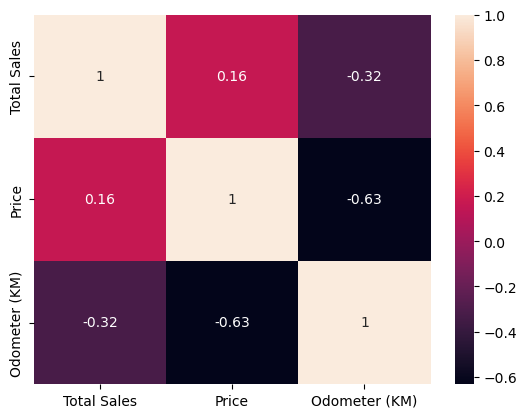

In [21]:
corr_matrix=data[['Total Sales', 'Price', 'Odometer (KM)']].corr()
corr_matrix
sns.heatmap(corr_matrix, annot=True)

# Observation

### - Based on this correlation, it is understandable that some columns have a negative correlation; Odometer with Total Sales and Price
### - There are some columns with a positive correlation; Price with Total Sales 